# Skill Test document

* Name: Vadim Sokoltsov
* Date: 06.10.2025
* E-mail: 

Note: Please make sure you send the necessary documentation to run this notebook. If you installed any library do not forget to send the requirements.txt

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT = Path(os.path.abspath('')).resolve().parents[0]
DATA = ROOT / "data"
INTERIM_DATA = DATA / "interim"

In [3]:
trx = pd.read_csv(DATA / "transactions.csv", parse_dates=['TX_DATETIME'], dtype = {'CUSTOMER_ID': np.int64,'SECTOR_ID': np.int64,'TX_FRAUD': np.int8})

# EDA

## Validating assumptions

Here we validate some first level assumptions on the data.

In [4]:
#Each customer has an unique sector
(trx.groupby('CUSTOMER_ID').SECTOR_ID.nunique() == 1).all()

np.True_

In [5]:
#No NANs in the data 
trx.isna().any()

CUSTOMER_ID    False
TX_DATETIME    False
TX_AMOUNT      False
SECTOR_ID      False
TX_FRAUD       False
dtype: bool

In [6]:
#Data types
trx.dtypes

CUSTOMER_ID             int64
TX_DATETIME    datetime64[ns]
TX_AMOUNT             float64
SECTOR_ID               int64
TX_FRAUD                 int8
dtype: object

## Descriptive Analysis

In [7]:
#Total transactions and columns
nb_transactions = len(trx)
nb_customers = trx.CUSTOMER_ID.nunique()
nb_sectors = trx.SECTOR_ID.nunique()
nb_frauds = len(trx[trx.TX_FRAUD == 1])
start_date = trx.TX_DATETIME.min()
end_date = trx.TX_DATETIME.max()
nb_days = (end_date - start_date).days

print(f"We have a total of {nb_transactions} transactions")
print(f"We have a total of {nb_frauds} frauds")
print(f"The dataset starts at {start_date} and ends at {end_date}. There are {nb_days} days in total")
print(f"They come from {nb_customers} customers from {nb_sectors} different sectors.")

We have a total of 1229921 transactions
We have a total of 3779 frauds
The dataset starts at 2023-01-01 00:21:42 and ends at 2023-06-18 13:37:52. There are 168 days in total
They come from 5000 customers from 20 different sectors.


In [8]:
trx.describe()

,CUSTOMER_ID,TX_DATETIME,TX_AMOUNT,SECTOR_ID,TX_FRAUD
count,1.229921e+06,1229921,1.229921e+06,1.229921e+06,1.229921e+06
mean,2.498093e+03,2023-03-28 05:59:47.830255616,5.283276e+02,9.541541e+00,3.072555e-03
min,0.000000e+00,2023-01-01 00:21:42,1.415089e+01,0.000000e+00,0.000000e+00
25%,1.247000e+03,2023-02-15 03:41:01,1.234908e+02,4.000000e+00,0.000000e+00
50%,2.497000e+03,2023-03-28 08:57:58,4.294975e+02,1.000000e+01,0.000000e+00
75%,3.744000e+03,2023-05-08 11:51:48,6.871575e+02,1.500000e+01,0.000000e+00
max,4.999000e+03,2023-06-18 13:37:52,4.328488e+03,1.900000e+01,1.000000e+00
std,1.442027e+03,NaN,5.218334e+02,5.825168e+00,5.534543e-02


In [9]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229921 entries, 0 to 1229920
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   CUSTOMER_ID  1229921 non-null  int64         
 1   TX_DATETIME  1229921 non-null  datetime64[ns]
 2   TX_AMOUNT    1229921 non-null  float64       
 3   SECTOR_ID    1229921 non-null  int64         
 4   TX_FRAUD     1229921 non-null  int8          
dtypes: datetime64[ns](1), float64(1), int64(2), int8(1)
memory usage: 38.7 MB


In [10]:
trx.head(5)

,CUSTOMER_ID,TX_DATETIME,TX_AMOUNT,SECTOR_ID,TX_FRAUD
0,2541,2023-01-01 00:21:42,499.210846,11,0
1,1735,2023-01-01 00:21:59,58.824293,3,0
2,669,2023-01-01 00:36:40,91.967189,12,0
3,4235,2023-01-01 00:51:34,836.571053,16,0
4,2162,2023-01-01 01:15:23,1537.707662,19,0


In [11]:
trx.columns = trx.columns.str.lower().str.replace(" ", "_")

In [12]:
trx.head(5)

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud
0,2541,2023-01-01 00:21:42,499.210846,11,0
1,1735,2023-01-01 00:21:59,58.824293,3,0
2,669,2023-01-01 00:36:40,91.967189,12,0
3,4235,2023-01-01 00:51:34,836.571053,16,0
4,2162,2023-01-01 01:15:23,1537.707662,19,0


<Axes: xlabel='tx_amount', ylabel='Count'>

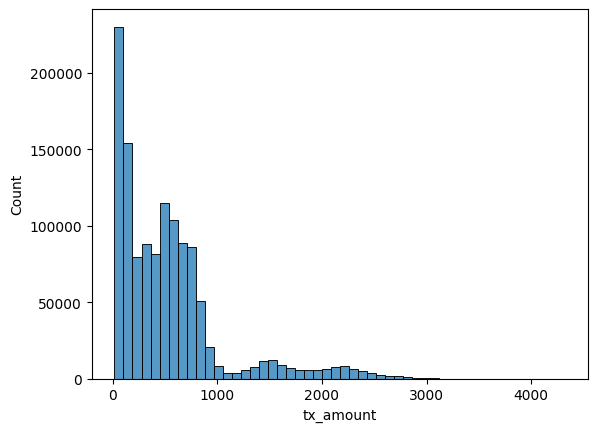

In [13]:
sns.histplot(trx['tx_amount'], bins=50)

Since `tx_amount` column has a long tail, it makes sense to represent it as `log()`value

<Axes: xlabel='tx_amount', ylabel='Count'>

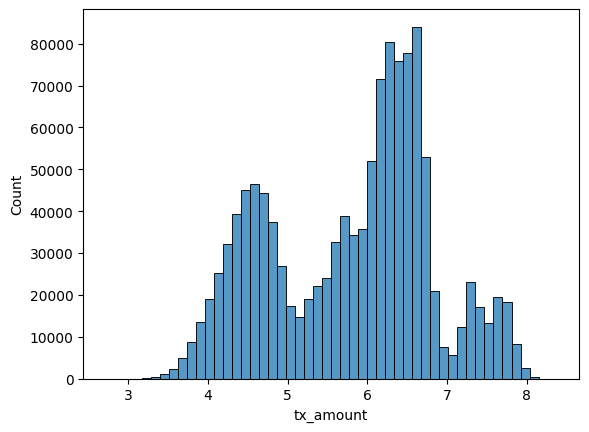

In [14]:
sns.histplot(np.log1p(trx['tx_amount']), bins=50)

In [15]:
trx['tx_amount_log'] = np.log1p(trx['tx_amount'])

In [16]:
trx['day_of_week'] = trx['tx_datetime'].dt.day_of_week
trx['hour'] = trx['tx_datetime'].dt.hour
trx['month'] = trx['tx_datetime'].dt.month
trx['is_month_start'] = trx['tx_datetime'].dt.is_month_start.astype('int')
trx['is_month_end'] = trx['tx_datetime'].dt.is_month_end.astype('int')
trx['is_weekend'] = trx['day_of_week'].isin({5, 6}).astype('int')

## Save model

In [17]:
trx.to_parquet(INTERIM_DATA / "transactions.parquet.gzip", compression='gzip')